In [16]:
%load_ext autoreload
%autoreload 2

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
import json
from random import sample

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import torch
import torch.nn.functional as F

from transformers import *

In [19]:
models = {}

In [20]:
model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-base', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-large', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-large and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [23]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2-large', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [24]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2-xl', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [25]:
model, tokenizer, mask_token = models['roberta-large']

In [ ]:
text = 'Paris is the _ of France'
text = 'Paris is the captital of'
text = 'Q: 4 and 9, which is larger? A:'
text = '''Q: 3 and 5, which is larger? A: 5.
Q: 4 and 9, which is larger? A:'''
text = '''Q: 5, 3, 3, which is different from the others? A: 5.
Q: 2, 2, 7, which is different from the others? A: 7.
Q: 9, 4, 9, which is different from the others? A:'''
text = '''Q: 5, 3, 2. Which is in the middle? A: 3.
Q: 5, 4, 2. Which is in the middle? A:'''
texts = [
'''\
Q: double c. A: c c.
Q: double b. A:''',
'''\
Q: b b b, c c. Which is more, b or c? A: b.
Q: e e , f f f. Which is more, e or f? A: f.
Q: g g g, d d. Which is more, g or d? A:''',
'''\
a b c changes to a b d.
p q r changes to p q s.
i j k changes to''',
'''\
a b c changes to a b d.
p q r s changes to p q r t.
i j k l m changes to''',
    
    
    
# '''\
# i i j j k k changes to i i j j l l.
# a a b b c c changes to a a b b d d.
# p p q q r r changes to''',
# '''\
# a b c changes to a b d.
# e f g h changes to e f g i.
# u v w x y changes to''',
# '''\
# Q: b b b, c c. Which is more, former or latter? A: former.
# Q: e e , f f f. Which is more, former or latter? A: latter.
# Q: g g g, d d. Which is more, former or latter? A:''',
# '''\
# Q: Surround f with b. A: b f b.
# Q: Surround a with d. A: d a d.
# Q: Surround c with e. A:''',
# '''\
# Q: c, b, f. Which letter follows c? A: b.
# Q: b, a, g. Which letter follows a? A: g
# Q: f, g, d. Which letter follows f? A:''',
]

# text = '''Q: 5, 3, 3, which is special? A: 5.
# Q: 2, 2, 7, which is special? A: 7.
# Q: 9, 4, 9, which is special? A:'''

# text = '''Q: 1, 0, 3, 0, 0, 5. Remove 0s. A: 1, 3, 5.
# Q: 0, 1, 3, 0, 5, 5. Remove 0s. A: 1, 3, 5.
# Q: 2, 0, 0, 4, 1, 0. Remove 0s. A:'''

# text = '''Q: 4, 9, 5, which is the largest? A: 9.
# Q: 8, 2, 6, which is the largest? A: 8.
# Q: 3, 1, 7, which is the largest? A: 7.
# Q: 1, 7, 3, which is the largest? A:'''

# text = '''Q: Swap 4 and 7. A: 7 and 4.
# Q: Swap 9 and 3. A: 3 and 9.
# Q: Swap 5 and 2. A:'''

# text = '''Q: 4 = 4? A: Yes.
# Q: 6 = 2? A: No.
# Q: 2 = 2? A: Yes.
# Q: 5 = 5? A:'''

# text = '''Q: 4 and 4. A: Same.
# Q: 6 and 2. A: Different.
# Q: 2 and 2. A: Same.
# Q: 2 and 2. A:'''

# text = '''Q: Which is the former of 5 and 2? A: 5.
# Q: Which is the latter of 7 and 9? A: 9.
# Q: Which is the latter of 1 and 7? A: 7.
# Q: Which is the latter of 6 and 3? A:'''  # former is wrong

# text = '''Q: 5 and 2, which is the former? A: 5.
# Q: 7 and 9, which is the latter? A: 9.
# Q: 1 and 7, Which is the latter? A: 7.
# Q: 6 and 3. Which is the latter? A:'''

# text = '''Q: 5, 3, 2. Which is the first? A: 5.
# Q: 7, 9, 2. Which is the second? A: 9.
# Q: 1, 4, 7. Which is the third? A: 7.
# Q: 5, 4, 2. Which is the second? A:'''

# text = '''Q: 5, 3, 3. How many 3s? A: 2.
# Q: 4, 2, 7. How many 4s? A: 1.
# Q: 1, 1, 1. How many 1s? A: 3.
# Q: 2, 4, 2. How many 5s? A: 0.
# Q: 6, 1, 6. How many 6s? A:'''

text = texts[-1]

In [42]:
# 使用BATS_3.04_Lexicographic_semantics的数据替换
import re
# 处理数据，讲词库数据处理为形式 [[[idx_list1],[idx_antonyms_list1]],[[],[]],....]
filename = 'antonyms_adj.txt'
result=[]
with open('antonyms_adj.txt','r') as f:
    for line in f:
        a = re.split(r'[\s]',line)
        b = re.split(r'/',a[0])
        c = re.split(r'/',a[1])
        d = [b,c]
        result.append(d)

#词替换
adj_model = ['John is * _ than Mary means that Mary is * = than John .',
             'John is * _ but Mary is * = .',
             'Ball A is * _ than ball B so ball B is * = .',
             
            ]
noun_model = []
texts = []
for text in adj_model:
    for idx_list,idx_antonym_list in result:
        for idx in idx_list:
            #print(idx)
            for idx_antonym in idx_antonym_list:
                #print(idx_antonym)
                example = text.replace('_', idx).replace('=', idx_antonym)
                texts.append(example)
print("..................")  

..................


In [43]:

all_attn_probs, idx_pairs, tokenses = [], [], []
for text in texts:
# for pair in pairs[-4:]:
#     text = templates[1] % pair
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        #print(tokens[p], tokens[h])
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    #print(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        logits, attns = model(input_ids, output_attentions=True)
        probs = F.softmax(logits, dim=-1)

   # for i in pred_idx:
        #print(i)
        #top_probs, top_indexes = probs[0][i].topk(5)
        #top_tokens = tokenizer.convert_ids_to_tokens(top_indexes)
        #print(top_tokens)
        #print(top_probs)

    attn_scores, attn_probs = zip(*attns)
    attn_scores, attn_probs = torch.cat(attn_scores, dim=0), torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
    idx_pairs.append((p, h))
    tokenses.append(tokens)
#     token_pairs.append((tokens[p].replace('Ġ', ''), tokens[h].replace('Ġ', '')))

# 求反义词队的平均值
attn_sum = np.zeros((24, 16),dtype='float32')
i = 0
for attn_every, (p, h) in zip(all_attn_probs, idx_pairs): 
    attn_one = np.array(attn_every[:, :, h, p])
   #求和
    attn_sum += attn_one
    #print("....................")
    i = i+1
#求平均
attn_average = attn_sum/i
average = attn_average.tolist()
#print(average)

In [44]:
fig, axs = plt.subplots(1,len(all_attn_probs),sharey=False, figsize=(4 * len(all_attn_probs), 6))
for attn_probs, (p, h), tokens, ax in zip(all_attn_probs, idx_pairs, tokenses, axs):
    ax = sns.heatmap(attn_probs[:, :, h, p], square=True, cbar=False, ax=ax)
    ax.tick_params(top=True, labeltop=True)
    ax.set_xlabel('%s - %s' % (tokens[p], tokens[h]))

ValueError: Image size of 671328x432 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 671328x432 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 671328x432 with 2331 Axes>

Text(0.5, 33.0, 'Average-antonym-head')

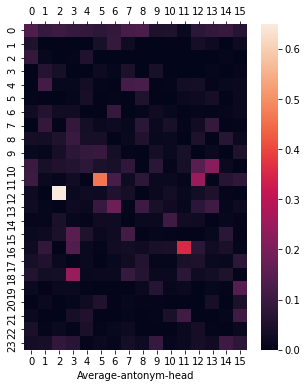

In [45]:
# 求平均后的head图
fig = plt.subplots(1,1,sharey=False, figsize=(5 , 6))
ax = sns.heatmap(attn_average)
ax.tick_params(top=True, labeltop=True)
ax.set_xlabel('Average-antonym-head')

In [46]:
# 找上下位关系
# 使用BATS_3.04_Lexicographic_semantics的数据替换
import re
# 处理数据，讲词库数据处理为形式 [[[idx_list1],[idx_antonyms_list1]],[[],[]],....]
filename = 'hypernyms - animals.txt'
result=[]
with open(filename,'r') as f:
    for line in f:
        a = re.split(r'[\s]',line)
        b = re.split(r'/',a[0])
        c = re.split(r'/',a[1])
        b1 = b
        c1 = c
        for word_b in b:
            word_id = tokenizer._convert_token_to_id('Ġ'+ word_b)
            if (word_id == 3):
                b1.remove(word_b)
        for word_c in c:
            word_id = tokenizer._convert_token_to_id('Ġ'+ word_c)
            if (word_id == 3):
                c1.remove(word_c)
        d = [b1,c1]
        result.append(d)

#词替换
animal_model = ['* _ is a kind of * _= .',
             'What is a * _ ? It is a kind of * = .'
            ]
n_model = []
texts = []
for text in animal_model:
    for idx_list,idx_antonym_list in result:
        for idx in idx_list:
            #print(idx)
            for idx_antonym in idx_antonym_list:
                #print(idx_antonym)
                example = text.replace('_', idx).replace('=', idx_antonym)
                texts.append(example)
#print(texts)
#print("..................")  

In [47]:
# 计算上下位的head
all_attn_probs, idx_pairs, tokenses = [], [], []
for text in texts:
# for pair in pairs[-4:]:
#     text = templates[1] % pair
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        #print(tokens[p], tokens[h])
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    #print(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        logits, attns = model(input_ids, output_attentions=True)
        probs = F.softmax(logits, dim=-1)

   # for i in pred_idx:
        #print(i)
        #top_probs, top_indexes = probs[0][i].topk(5)
        #top_tokens = tokenizer.convert_ids_to_tokens(top_indexes)
        #print(top_tokens)
        #print(top_probs)

    attn_scores, attn_probs = zip(*attns)
    attn_scores, attn_probs = torch.cat(attn_scores, dim=0), torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
    idx_pairs.append((p, h))
    tokenses.append(tokens)
#     token_pairs.append((tokens[p].replace('Ġ', ''), tokens[h].replace('Ġ', '')))

# 求反义词队的平均值
attn_sum = np.zeros((24, 16),dtype='float32')
i = 0
for attn_every, (p, h) in zip(all_attn_probs, idx_pairs): 
    attn_one = np.array(attn_every[:, :, h, p])
   #求和
    attn_sum += attn_one
    #print("....................")
    i = i+1
#求平均
attn_average = attn_sum/i
average = attn_average.tolist()
#print(average)

Text(0.5, 33.0, 'Average-hypernyms-head')

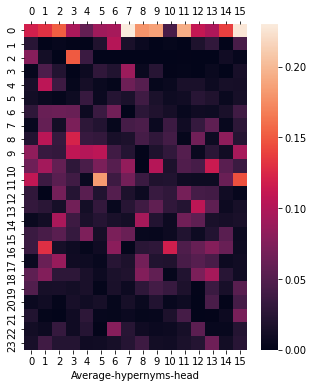

In [48]:
# 求上下位的平均head头
fig = plt.subplots(1,1,sharey=False, figsize=(5 , 6))
ax = sns.heatmap(attn_average)
ax.tick_params(top=True, labeltop=True)
ax.set_xlabel('Average-hypernyms-head')


In [ ]:
# 找因果关系
# 使用BATS_3.04_Lexicographic_semantics的数据替换
import re
# 处理数据，将词库数据处理为形式 [[[idx_list1],[idx__list1]],[[],[]],....]
filename = 'hypernyms - animals.txt'
result=[]
with open(filename,'r') as f:
    for line in f:
        a = re.split(r'[\s]',line)
        b = re.split(r'/',a[0])
        c = re.split(r'/',a[1])
        d = [b,c]
        result.append(d)

#词替换
animal_model = ['Because of  his * _, we lost a lot of * _ .',
             'The decline in * _ is due to * _ .',
             'The * _ is attributable to the * _ .'
             
            ]
n_model = []
texts = []
for text in animal_model:
    for idx_list,idx_antonym_list in result:
        for idx in idx_list:
            #print(idx)
            for idx_antonym in idx_antonym_list:
                #print(idx_antonym)
                example = text.replace('_', idx).replace('=', idx_antonym)
                texts.append(example)

In [ ]:
i = 0
layer, head = 11, 5
attn = all_attn_probs[i][layer, head]
tokens = tokenses[i]
size = round(attn.size(0) / 3)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(size  * 2., size), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap((attn * 100).long(), square=True, cbar=False, annot=True, fmt='d', xticklabels=tokens, yticklabels=tokens, ax=ax0)
plot_head_attn(attn, tokens, ax1=ax1) 

In [ ]:
def plot_head_attn(attn, tokens, ax1=None):
    assert attn.size(0) == attn.size(1) == len(tokens)
#     fig = plt.figure(figsize=(4, round(attn.size(0) / 4)))
    if ax1 is None: ax1 = plt.gca()
    for i in range(attn.size(0)):
        for j in range(attn.size(1)):
            if j in [0, attn.size(1) - 1] or attn[i, j].item() < 0.2: continue
            plt.plot([0, 1], [i, j], color='b', alpha=attn[i, j].item())
    ax1.set_xticks([0, 1])
    ax1.set_xlim(0, 1)
    ax1.axes.xaxis.set_visible(False)

    ax2 = ax1.twinx()
    for ax in [ax1, ax2]: # has to duplicate axes to set color of yticklabel
        ax.set_yticks(np.arange(attn.size(0)))
        ax.set_yticklabels(tokens, fontsize=12)
        for i, yticklabel in enumerate(ax.get_yticklabels()):
            if i in [p, h]:
                yticklabel.set_color('r')
        ax.tick_params(length=0)
        ax.set_ylim(attn.size(0) - 1, 0)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    plt.show()